In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "data/laureates-1000.json"

with open(file_path, 'r') as file:
    data = json.load(file)

laureates = data['laureates']

In [3]:
laureates[1:2][0]

{'id': '102',
 'knownName': {'en': 'Aage N. Bohr', 'se': 'Aage N. Bohr'},
 'givenName': {'en': 'Aage N.', 'se': 'Aage N.'},
 'familyName': {'en': 'Bohr', 'se': 'Bohr'},
 'fullName': {'en': 'Aage Niels Bohr', 'se': 'Aage Niels Bohr'},
 'fileName': 'bohr',
 'gender': 'male',
 'birth': {'date': '1922-06-19',
  'place': {'city': {'en': 'Copenhagen', 'no': 'København', 'se': 'Köpenhamn'},
   'country': {'en': 'Denmark', 'no': 'Danmark', 'se': 'Danmark'},
   'cityNow': {'en': 'Copenhagen',
    'no': 'København',
    'se': 'Köpenhamn',
    'sameAs': ['https://www.wikidata.org/wiki/Q1748',
     'https://www.wikipedia.org/wiki/Copenhagen'],
    'latitude': '55.678127',
    'longitude': '12.572532'},
   'countryNow': {'en': 'Denmark',
    'no': 'Danmark',
    'se': 'Danmark',
    'sameAs': ['https://www.wikidata.org/wiki/Q35'],
    'latitude': '56.000000',
    'longitude': '10.000000'},
   'continent': {'en': 'Europe', 'no': 'Europa', 'se': 'Europa'},
   'locationString': {'en': 'Copenhagen, Den

In [4]:
age_data = []

for laureate in laureates:
    birth_date = laureate.get('birth', {}).get('date')
    if not birth_date or birth_date.startswith('0000'):  # Skip entries with missing or invalid birth dates
        continue
    
    for prize in laureate.get('nobelPrizes', []):
        award_year = prize.get('awardYear')
        if award_year and birth_date:
            birth_year = birth_date.split('-')[0]
            if birth_year != "0000" and award_year.isdigit() and birth_year.isdigit():
                age_at_award = int(award_year) - int(birth_year)
                age_data.append({
                    'name': laureate.get('knownName', {}).get('en', 'Unknown'),
                    'birth_date': birth_date,
                    'award_year': award_year,
                    'age_at_award': age_at_award
                })

In [6]:
# Convert the age data into a DataFrame
df_age_data = pd.DataFrame(age_data)

In [28]:
df_age_data.head()

,name,birth_date,award_year,age_at_award
0,A. Michael Spence,1943-00-00,2001,58
1,Aage N. Bohr,1922-06-19,1975,53
2,Aaron Ciechanover,1947-10-01,2004,57
3,Aaron Klug,1926-08-11,1982,56
4,Abdulrazak Gurnah,1948-00-00,2021,73


In [8]:
age_count = df_age_data['age_at_award'].value_counts().sort_index()

In [11]:
age_count.head()

age_at_award
17    1
25    2
31    4
32    4
33    4
Name: count, dtype: int64

In [12]:
age_count.tail()

age_at_award
88    2
89    2
90    3
96    1
97    1
Name: count, dtype: int64

In [13]:
age_count.to_csv('data/age_count.csv')

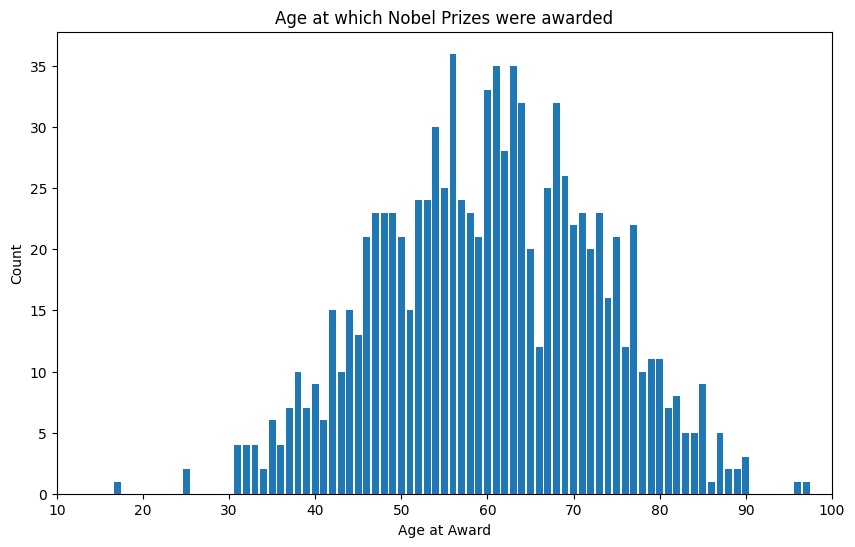

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(age_count.index, age_count.values)
plt.xlabel('Age at Award')
plt.ylabel('Count')
plt.title('Age at which Nobel Prizes were awarded')
plt.xlim(10, 100)
plt.show()

In [23]:
df_age_data['age_at_award'].describe()

count    970.000000
mean      60.256701
std       12.634624
min       17.000000
25%       51.000000
50%       60.500000
75%       69.000000
max       97.000000
Name: age_at_award, dtype: float64

In [25]:
df_age_data['age_at_award'].mode()

0    56
Name: age_at_award, dtype: int64

In [26]:
# The average age is 60, how many people were awarded at that age?
age_count.loc[60]

33

In [32]:
df_age_data.sort_values('age_at_award', ascending=False).head()

,name,birth_date,award_year,age_at_award
469,John B. Goodenough,1922-07-25,2019,97
75,Arthur Ashkin,1922-09-02,2018,96
535,Klaus Hasselmann,1931-10-25,2021,90
871,Syukuro Manabe,1931-09-21,2021,90
557,Leonid Hurwicz,1917-08-21,2007,90


In [33]:
df_age_data.sort_values('age_at_award', ascending=False).tail()

,name,birth_date,award_year,age_at_award
122,Carl D. Anderson,1905-09-03,1936,31
902,Tsung-Dao Lee,1926-11-24,1957,31
639,Nadia Murad,1993-00-00,2018,25
547,Lawrence Bragg,1890-03-31,1915,25
585,Malala Yousafzai,1997-07-12,2014,17
